CANNY EDGE DETECTION

NISAA' HUSNIA YAHYA -2213020099/3A

Import Library

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Untuk Gaussian Blur

Buka Gambar dan Konversi Grayscale

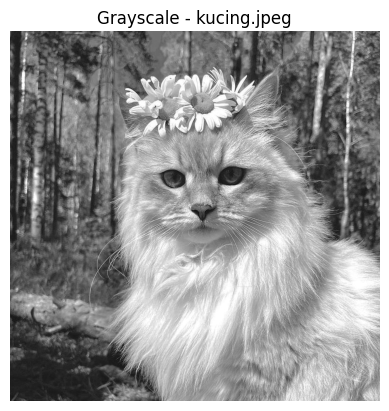

In [7]:
# Buka gambar dan konversi ke grayscale
img = Image.open('kucing.jpeg').convert('L')  # 'L' = grayscale
gray = np.array(img)

# Tampilkan gambar asli dan grayscale
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale - kucing.jpeg')
plt.show()


Gaussian Blur (Mengurangi Noise)

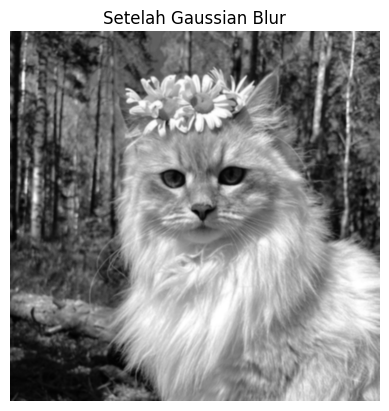

In [ ]:
# Gaussian Blur menggunakan OpenCV
blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.title('Setelah Gaussian Blur')
plt.show()

Sobel Operator

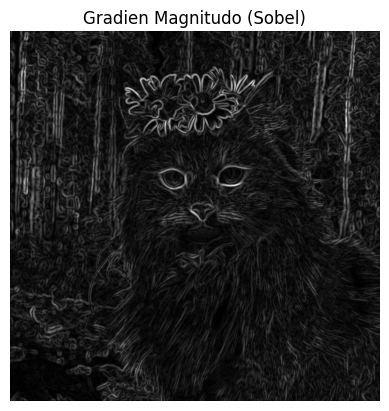

In [9]:
# Hitung gradien menggunakan Sobel
Gx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Magnitudo dan arah
magnitude = np.hypot(Gx, Gy)
magnitude = magnitude / magnitude.max() * 255
angle = np.arctan2(Gy, Gx)

plt.imshow(magnitude, cmap='gray')
plt.axis('off')
plt.title('Gradien Magnitudo (Sobel)')
plt.show()

Non-Maximum Suppression (Menipiskan Tepi)

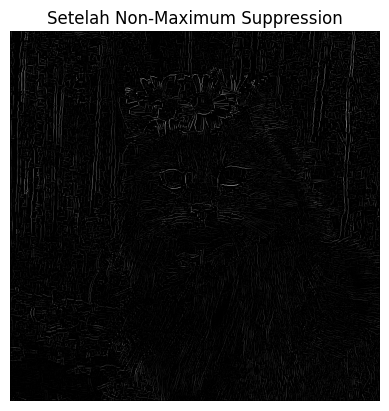

In [10]:
def non_max_suppression(mag, angle):
    Z = np.zeros_like(mag)
    angle = angle * 180. / np.pi
    angle[angle < 0] += 180

    for y in range(1, mag.shape[0] - 1):
        for x in range(1, mag.shape[1] - 1):
            q = 255
            r = 255

            # arah horizontal
            if (0 <= angle[y, x] < 22.5) or (157.5 <= angle[y, x] <= 180):
                q = mag[y, x + 1]
                r = mag[y, x - 1]
            # arah diagonal /
            elif (22.5 <= angle[y, x] < 67.5):
                q = mag[y + 1, x - 1]
                r = mag[y - 1, x + 1]
            # arah vertikal
            elif (67.5 <= angle[y, x] < 112.5):
                q = mag[y + 1, x]
                r = mag[y - 1, x]
            # arah diagonal \
            elif (112.5 <= angle[y, x] < 157.5):
                q = mag[y - 1, x - 1]
                r = mag[y + 1, x + 1]

            if (mag[y, x] >= q) and (mag[y, x] >= r):
                Z[y, x] = mag[y, x]
            else:
                Z[y, x] = 0
    return Z

nms_result = non_max_suppression(magnitude, angle)

plt.imshow(nms_result, cmap='gray')
plt.axis('off')
plt.title('Setelah Non-Maximum Suppression')
plt.show()


Double Threshold + Hysteresis

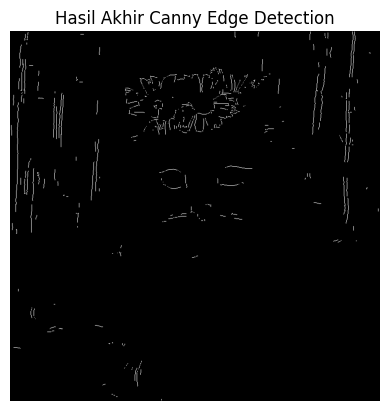

In [11]:
def double_threshold_hysteresis(img, low=50, high=100):
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.uint8)

    strong = 255
    weak = 75

    strong_i, strong_j = np.where(img >= high)
    weak_i, weak_j = np.where((img >= low) & (img < high))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    # Hysteresis: sambungkan weak edge yang terhubung ke strong edge
    for y in range(1, M - 1):
        for x in range(1, N - 1):
            if res[y, x] == weak:
                if ((res[y+1, x-1] == strong) or (res[y+1, x] == strong) or (res[y+1, x+1] == strong)
                    or (res[y, x-1] == strong) or (res[y, x+1] == strong)
                    or (res[y-1, x-1] == strong) or (res[y-1, x] == strong) or (res[y-1, x+1] == strong)):
                    res[y, x] = strong
                else:
                    res[y, x] = 0
    return res

canny_result = double_threshold_hysteresis(nms_result)

plt.imshow(canny_result, cmap='gray')
plt.axis('off')
plt.title('Hasil Akhir Canny Edge Detection')
plt.show()
